<a href="https://colab.research.google.com/github/ehye1/data-python/blob/main/chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **그래프 만들기**

**08-2 산점도 - 변수 간 관계 표현하기**

In [38]:
import pandas as pd
mpg = pd.read_csv('mpg.csv')

<Axes: xlabel='displ', ylabel='hwy'>

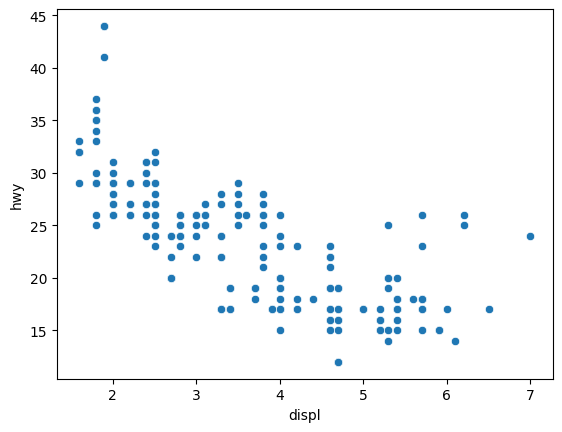

In [2]:
import seaborn as sns
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy')

[(3.0, 6.0)]

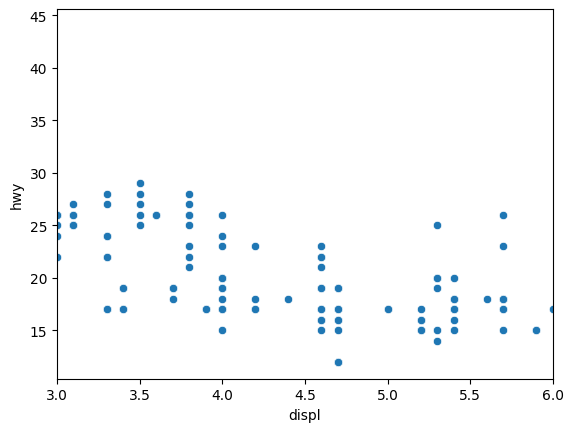

In [3]:
#축 범위 설정하기 (데이터 일부만 표현)
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy') \
  .set(xlim = (3, 6))

<Axes: xlabel='displ', ylabel='hwy'>

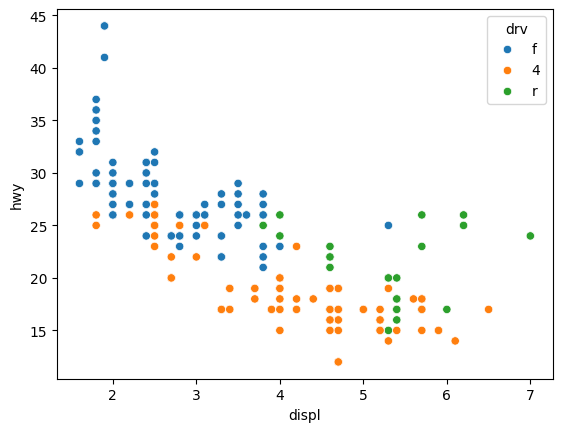

In [4]:
#drv별로 표식 색깔 다르게 표현
sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv')

**08-3 막대 그래프 - 집단 간 차이 표현하기**

In [7]:
#평균 막대 그래프 만들기
#집단별 평균표 만들기 (구동 방식별 고속도로 연비 평균)
df_mpg = mpg.groupby('drv') \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [8]:
#drv를 인덱스가 아닌 변수로 유지
df_mpg = mpg.groupby('drv', as_index = False) \
            .agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

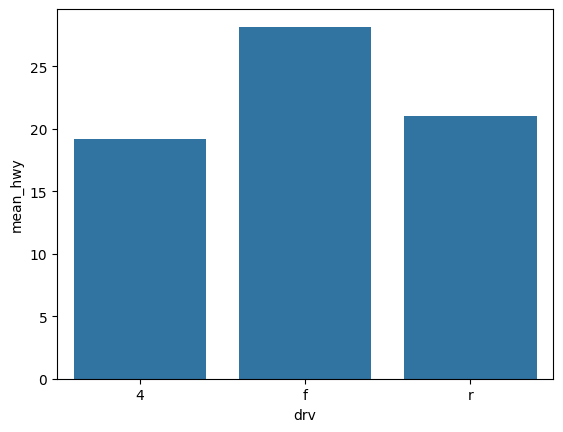

In [9]:
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

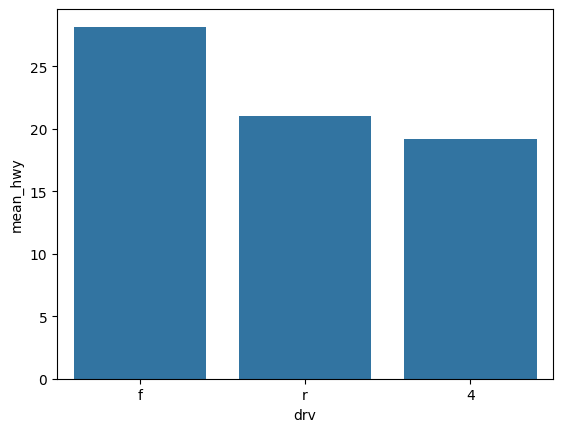

In [10]:
#크기순으로 정렬하기
df_mpg = df_mpg.sort_values('mean_hwy', ascending = False)
sns.barplot(data = df_mpg, x = 'drv', y = 'mean_hwy')

<Axes: xlabel='drv', ylabel='count'>

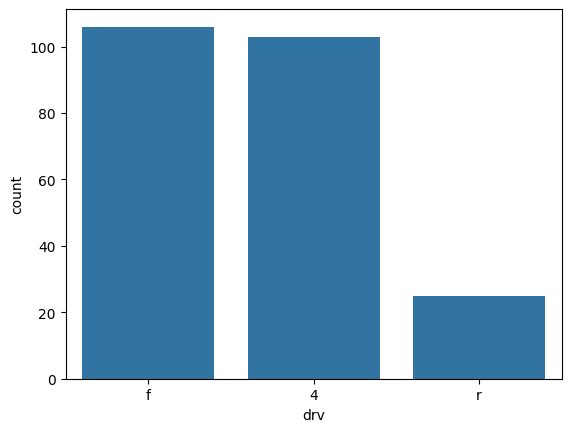

In [11]:
#빈도 막대 그래프 만들기
sns.countplot(data = mpg, x = 'drv')

In [13]:
#변수 순서 확인하기
mpg['drv'].unique()

array(['f', '4', 'r'], dtype=object)

<Axes: xlabel='drv', ylabel='count'>

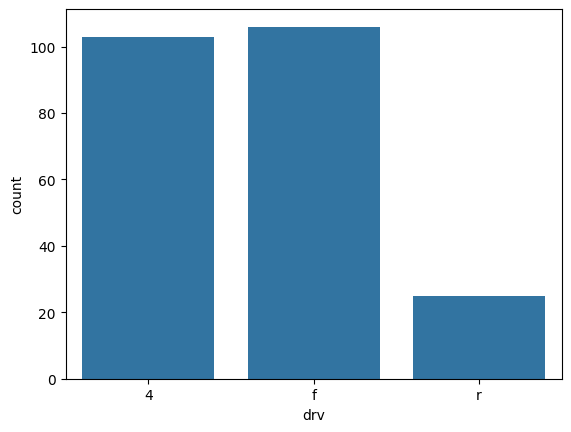

In [12]:
#막대 정렬하기
sns.countplot(data = mpg, x = 'drv', order = ['4', 'f', 'r'])

<Axes: xlabel='drv', ylabel='count'>

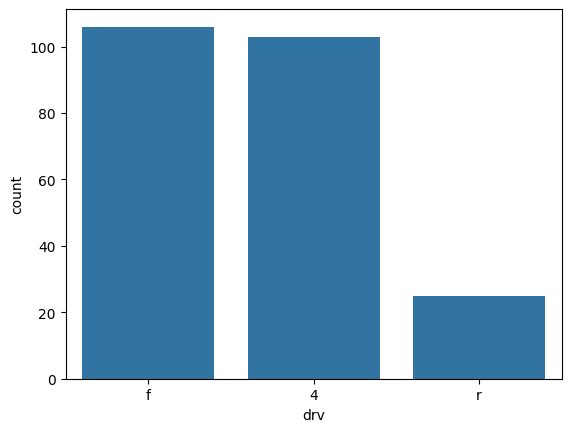

In [17]:
#drv 빈도 높은 순으로 막대 정렬
sns.countplot(data = mpg, x = 'drv', order = mpg['drv'].value_counts().index)

Q. 'suv' 차종을 대상으로 cty 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현하기

(막대는 연비가 높은 순으로 정렬하기)

In [41]:
df = mpg.query('category == "suv"') \
        .groupby('manufacturer', as_index = False) \
        .agg(mean_cty = ('cty', 'mean')) \
        .sort_values('mean_cty', ascending = False) \
        .head(5)
df

,manufacturer,mean_cty
8,subaru,18.833333
9,toyota,14.375000
7,nissan,13.750000
3,jeep,13.500000
6,mercury,13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

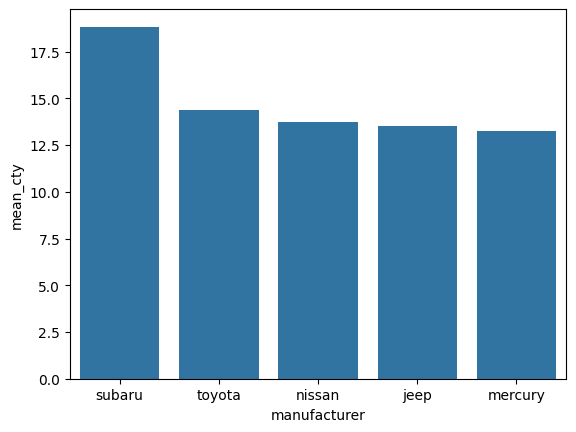

In [42]:
sns.barplot(data = df, x = 'manufacturer', y = 'mean_cty')

**08-4 선 그래프 - 시간에 따라 달라지는 데이터 표현하기**

In [44]:
economics = pd.read_csv('economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

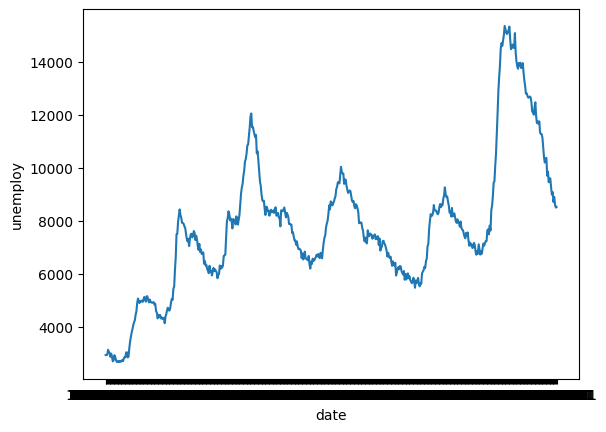

In [45]:
sns.lineplot(data = economics, x = 'date', y = 'unemploy')

In [47]:
#x축에 연도 표시하기
#날짜 시간 타입 변수 만들기
economics['date2'] = pd.to_datetime(economics['date'])
economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [48]:
#연 추출
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int64

In [49]:
#연도 변수 만들기
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

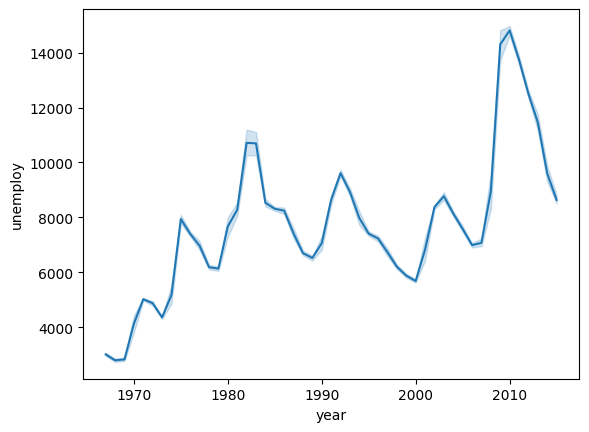

In [50]:
#x축에 연도 표시
sns.lineplot(data = economics, x = 'year', y = 'unemploy')

<ipython-input-51-96b9e000bbf8>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)


<Axes: xlabel='year', ylabel='unemploy'>

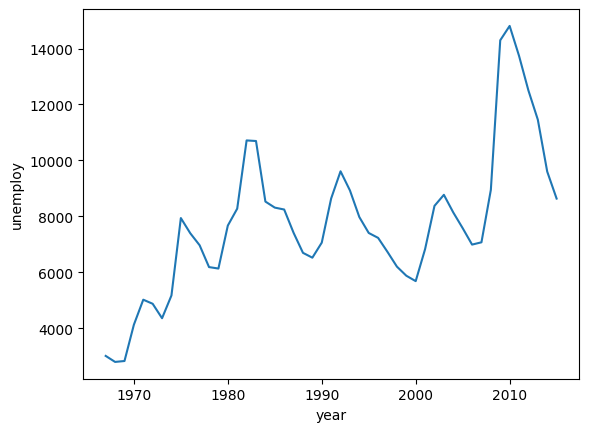

In [51]:
#신뢰구간 제거
sns.lineplot(data = economics, x = 'year', y = 'unemploy', ci = None)

Q. 2014년 월별 psavert의 변화를 나타낸 시계열 그래프 만들기

<ipython-input-53-56d22ebf0af9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = df_2014, x = 'month', y = 'psavert', ci = None)


<Axes: xlabel='month', ylabel='psavert'>

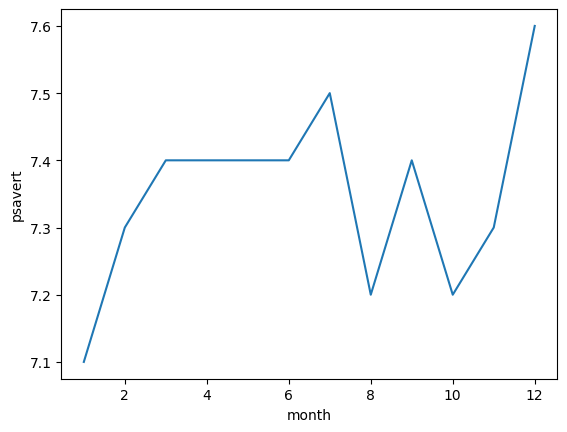

In [53]:
economics['month'] = economics['date2'].dt.month
df_2014 = economics.query('year == 2014')
sns.lineplot(data = df_2014, x = 'month', y = 'psavert', ci = None)

**08-5 상자 그림 - 집단 간 분포 차이 표현하기**

<Axes: xlabel='drv', ylabel='hwy'>

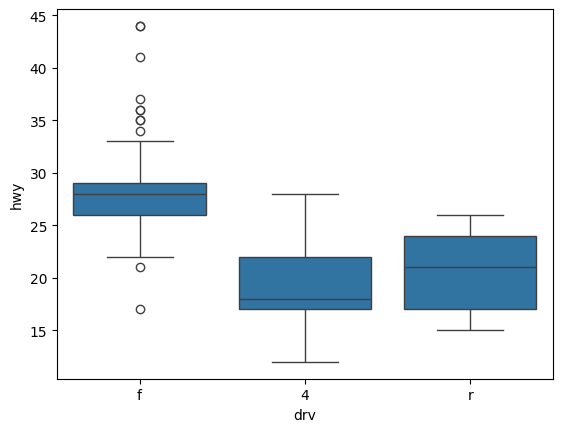

In [54]:
#구동 방식별 고속도로 연비 상자 그림으로 표현
sns.boxplot(data = mpg, x = 'drv', y = 'hwy')